<font size="10"> Multiple Linear Regresssion </font>


<font size="6"> Project Overview </font>

In this project, i have created the multiple linear regression model to study the linear relationship between differenet feature data percent of cancer, and predict the chances to have cancer disease.

<font size="6"> LIBRARY </font>


• Numpy – It provides a fast numerical array structure and operating functions.

• pandas – It provides tools for data storage, manipulation and analysis tasks.

• Scikit-Learn – The required machine learning library in Python.

• Matplotlib – It is the basic plotting library in Python. It provides tools for making plots.

• Seaborn - It is also the library for visualization.

In [2]:
import numpy as np
import pandas as pd

# To visualize our data
import seaborn as sns
import matplotlib.pyplot as plt

#  To split our dataset into parts (train & test)
from sklearn.model_selection import train_test_split

#  To train and implementing our model
from sklearn.linear_model import LinearRegression

#  r2_score used to check accuracy of our model
from sklearn.metrics import r2_score

<font size="6"> DATASET </font>

I got the data from <a href="https://www.kaggle.com/datasets/zahidmughal2343/global-cancer-patients-2015-2024/data"> KAGGLE </a>

This dataset contains 15 Main features.

In [44]:
# Import the dataset

df = pd.read_csv('Cancer_dataset.csv')

<font size="5">pandas shape attribute</font>



The shape attribute of the pandas dataframe gives the dimensions of the dataframe.

In [45]:
print(df.shape)

(50000, 15)


<font size="5">pandas Columns attribute</font>



The columns attributes of pandas gives the name of all columns.

In [5]:
print(df.columns)

Index(['Patient_ID', 'Age', 'Gender', 'Country_Region', 'Year', 'Genetic_Risk',
       'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level',
       'Cancer_Type', 'Cancer_Stage', 'Treatment_Cost_USD', 'Survival_Years',
       'cancer_Score'],
      dtype='object')


<font size="6"> Pandas drop attributes </font>

I only use 10 feature of this dataset and delete other five with help of drop() attribute.

In [6]:
col_to_drop = ['Patient_ID','Country_Region','Year','Cancer_Type','Treatment_Cost_USD']
df = df.drop(columns=col_to_drop)
print(df.columns)

# df.drop('Patient_ID',axis='columns',inplace=True)
# df.drop('Country_Region',axis='columns',inplace=True)
# df.drop('Year',axis='columns',inplace=True)
# df.drop('Cancer_Type',axis='columns',inplace=True)
# df.drop('Treatment_Cost_USD',axis='columns',inplace=True)
# print(df.columns)

Index(['Age', 'Gender', 'Genetic_Risk', 'Air_Pollution', 'Alcohol_Use',
       'Smoking', 'Obesity_Level', 'Cancer_Stage', 'Survival_Years',
       'cancer_Score'],
      dtype='object')


<font size="5">pandas head() method</font>




I viewed the top 5 rows of the pandas dataframe with the pandas head() method.

In [7]:
print(df.head())

   Age  Gender  Genetic_Risk  Air_Pollution  Alcohol_Use  Smoking  \
0   71    Male           6.4            2.8          9.5      0.9   
1   34    Male           1.3            4.5          3.7      3.9   
2   80    Male           7.4            7.9          2.4      4.7   
3   40    Male           1.7            2.9          4.8      3.5   
4   43  Female           5.1            2.8          2.3      6.7   

   Obesity_Level Cancer_Stage  Survival_Years  cancer_Score  
0            8.7    Stage III             5.9          4.92  
1            6.3      Stage 0             4.7          4.65  
2            0.1     Stage II             7.1          5.84  
3            2.7      Stage I             1.6          3.12  
4            0.5    Stage III             2.9          3.62  


<font size="5">pandas info() method</font>



I viewed the summary of the dataframe with the pandas info() method

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             50000 non-null  int64  
 1   Gender          50000 non-null  object 
 2   Genetic_Risk    50000 non-null  float64
 3   Air_Pollution   50000 non-null  float64
 4   Alcohol_Use     50000 non-null  float64
 5   Smoking         50000 non-null  float64
 6   Obesity_Level   50000 non-null  float64
 7   Cancer_Stage    50000 non-null  object 
 8   Survival_Years  50000 non-null  float64
 9   cancer_Score    50000 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 3.8+ MB
None


<font size="5">pandas describe() method</font>



I look at the descriptive statistics of the dataframe with the pandas describe() method.

In [9]:
print(df.describe())

                Age  Genetic_Risk  Air_Pollution   Alcohol_Use       Smoking  \
count  50000.000000  50000.000000   50000.000000  50000.000000  50000.000000   
mean      54.421540      5.001698       5.010126      5.010880      4.989826   
std       20.224451      2.885773       2.888399      2.888769      2.881579   
min       20.000000      0.000000       0.000000      0.000000      0.000000   
25%       37.000000      2.500000       2.500000      2.500000      2.500000   
50%       54.000000      5.000000       5.000000      5.000000      5.000000   
75%       72.000000      7.500000       7.500000      7.500000      7.500000   
max       89.000000     10.000000      10.000000     10.000000     10.000000   

       Obesity_Level  Survival_Years  cancer_Score  
count   50000.000000    50000.000000  50000.000000  
mean        4.991176        5.006462      4.951207  
std         2.894504        2.883335      1.199677  
min         0.000000        0.000000      0.900000  
25%         2.

<font size="6"> FEATURE ENGINEERING </font>

I used Two methods : Ordinal Encoding  &  One-Hot Encoding.


<font size="3"> Ordinal Encoding for : Cancer_Stage, it's an orders form </font>


<font size="3"> One-Hot Encoding for : Cnacer_score, used if there are only 2 & 3 values</font>

In [10]:
#  ORDINAL ENCODING for Cancer_Stage
# We define a dictionary to map the order
stage_map = {
    'Stage 0': 0,
    'Stage I': 1,
    'Stage II': 2,
    'Stage III': 3,
    'Stage IV': 4
}
df['Cancer_Stage'] = df['Cancer_Stage'].map(stage_map)

#  ONE-HOT ENCODING for Gender
# We use drop_first=True to avoid the Dummy Variable Trap
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

# 5. VIEW THE TRANSFORMATION
print("Columns after transformation:")
print(df.columns.tolist())
print("\nFirst 5 rows:")
print(df.head())

# Save the transformed data
df.to_csv('Transformed_Cancer_Data.csv', index=False)

Columns after transformation:
['Age', 'Genetic_Risk', 'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level', 'Cancer_Stage', 'Survival_Years', 'cancer_Score', 'Gender_Male', 'Gender_Other']

First 5 rows:
   Age  Genetic_Risk  Air_Pollution  Alcohol_Use  Smoking  Obesity_Level  \
0   71           6.4            2.8          9.5      0.9            8.7   
1   34           1.3            4.5          3.7      3.9            6.3   
2   80           7.4            7.9          2.4      4.7            0.1   
3   40           1.7            2.9          4.8      3.5            2.7   
4   43           5.1            2.8          2.3      6.7            0.5   

   Cancer_Stage  Survival_Years  cancer_Score  Gender_Male  Gender_Other  
0             3             5.9          4.92         True         False  
1             0             4.7          4.65         True         False  
2             2             7.1          5.84         True         False  
3             1             1.6  

<font size="5"> VISUALIZTION </font>

I ploted the bar graph to see, how Cancer_stages relate to the Cancer_score.

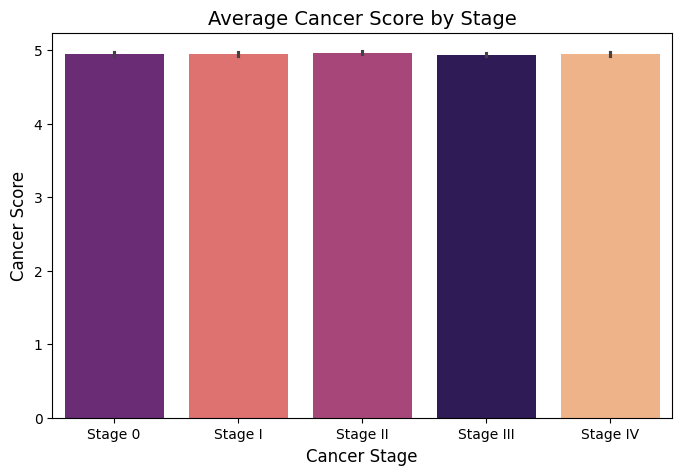

In [14]:
# Visualizition the data


df = pd.read_csv('Cancer_dataset.csv')
# Define the logical order for the X-axis
stage_order = ['Stage 0', 'Stage I', 'Stage II', 'Stage III', 'Stage IV']

# Create the Bar Plot (Average Cancer Score by Stage)
plt.figure(figsize=(8, 5))
sns.barplot(x='Cancer_Stage', y='cancer_Score', data=df, order=stage_order, palette='magma',hue='Cancer_Stage', legend=False)

# Add labels and title
plt.title('Average Cancer Score by Stage', fontsize=14)
plt.xlabel('Cancer Stage', fontsize=12)
plt.ylabel('Cancer Score', fontsize=12)
plt.show()

<font size="5"> Now the data i have is cleaned & performed fetured engineering on it. </font>

<font size="6"> Spliting & traning </font>


I splited the dataset into 2 variables x & y. 

In which x is the Independent dataset & y is the dependent dataset.


In [46]:
df = pd.read_csv("Transformed_Cancer_Data.csv")
x = df.drop(columns=['cancer_Score'])
y = df['cancer_Score'].values
print(x.head())
print(y)

   Age  Genetic_Risk  Air_Pollution  Alcohol_Use  Smoking  Obesity_Level  \
0   71           6.4            2.8          9.5      0.9            8.7   
1   34           1.3            4.5          3.7      3.9            6.3   
2   80           7.4            7.9          2.4      4.7            0.1   
3   40           1.7            2.9          4.8      3.5            2.7   
4   43           5.1            2.8          2.3      6.7            0.5   

   Cancer_Stage  Survival_Years  Gender_Male  Gender_Other  
0             3             5.9         True         False  
1             0             4.7         True         False  
2             2             7.1         True         False  
3             1             1.6         True         False  
4             3             2.9        False         False  
[4.92 4.65 5.84 ... 6.02 6.54 3.76]


In [17]:
print(x.shape)
print(y.shape)

(50000, 10)
(50000,)


<font size="6">Reshaping X and y</font>



Since we are working with Multiple feature variable, so we need to reshape using Numpy reshape() method.



In [18]:
y = y.reshape(-1,1)
print(x.shape)
print(y.shape)

(50000, 10)
(50000, 1)


<font size="6">Train test split</font>


I split the dataset into two sets namely - train set and test set.

The model learn the relationships from the training data and predict on test data

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(40000, 10)
(10000, 10)
(40000, 1)
(10000, 1)


<font size="6">Traning of model</font>


I split the dataset into two sets – the training set and the test set. Then, I instantiate the regressor lr and fit it on the training set with the fit method.

In this step, the model learned the relationships between the training data (X_train, y_train).

In [23]:
lr = LinearRegression()
lr.fit(x_train,y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


<font size="6">Model's slope and intercept</font>


The model slope/gradiant is given by lr.coef_ and model interception is given by lr.intercept_.

In [24]:
print("The slope/Gradiant of the model is :",lr.coef_)
print("The Interception of the model is :",lr.intercept_)

The slope/Gradiant of the model is : [[ 2.50216256e-05  2.01243270e-01  1.51494662e-01  1.50977654e-01
   2.02245933e-01  1.00327926e-01  1.95277292e-03  3.44783338e-04
  -1.40673650e-02 -1.71212831e-02]]
The Interception of the model is : [0.92327541]


<font size="6"> Making prediction </font>

Took the test values to predict, and to check if model is train properly or not.

I predict the model's output by .predict(),To do it, i created the new variable (y_pre).

In [25]:
y_pre =lr.predict(x_test)
print(y_pre)

[[6.28399031]
 [4.16183237]
 [6.28680312]
 ...
 [3.31817668]
 [3.85350778]
 [2.94233439]]


In [26]:
y_test

array([[7.22],
       [4.01],
       [6.06],
       ...,
       [3.26],
       [3.3 ],
       [3.11]], shape=(10000, 1))

<font size="6"> Check the accuracy of model </font>

<font size="5">R2 Score</font>



The higher the R2 Score value, the better the model fits the data. Usually, its value ranges from 0 to 1. So, we want its value to be as close to 1. Its value can become negative if our model is wrong.

In [27]:
print(r2_score(y_test,y_pre))

0.785220328917122


<font size="4">Since, we are using multiple feature dataset, To plot our data we need to transform dimension.

Force the data to be 1 dimensional, To do it i use .flatten() in numpy library. </font>

In [28]:
# 2. FORCE the data to be 1-dimensional to avoid the error
# .flatten() converts [[1], [2]] into [1, 2]
y_test_1d = np.array(y_test).flatten()
y_pre_1d = np.array(y_pre).flatten()

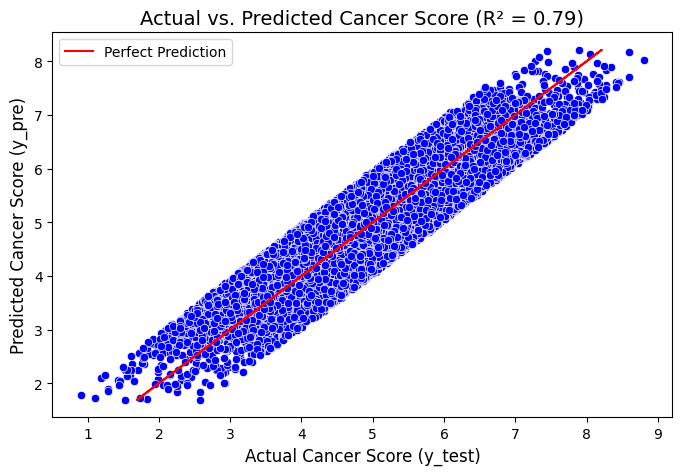

In [43]:
#  Setup the plot
plt.figure(figsize=(8, 5))

# Use the flattened 1D versions here
sns.scatterplot(x=y_test_1d, y=y_pre_1d, color='blue')
plt.plot(y_pre_1d,y_pre_1d, color='red', linestyle='-', label='Perfect Prediction')

plt.title(f'Actual vs. Predicted Cancer Score (R² = {r2_score(y_test_1d, y_pre_1d):.2f})', fontsize=14)
plt.xlabel('Actual Cancer Score (y_test)', fontsize=12)
plt.ylabel('Predicted Cancer Score (y_pre)', fontsize=12)
plt.legend()
plt.show()